In [1]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from ecpaper_utils import linfit_utils as linfit

importlib.reload(linfit)

<module 'ecpaper_utils.linfit_utils' from '/home/islas/python/ecpaper2020/ecpaper_utils/linfit_utils.py'>

In [2]:
cmip5jlats = "/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/jlatcmip5.nc"
cmip5errors = "../ERRORCALC/JLAT/DATA/errors_cmip5.nc"
errors1mem = "../ERRORCALC/JLAT/DATA/errors_1mem.nc"

In [3]:
jlat5 = xr.open_dataset(cmip5jlats)
error5 = xr.open_dataset(cmip5errors)
error1mem = xr.open_dataset(errors1mem)

In [6]:
#!!!!!! STILL TO DO - the parts involving global mean T

jlatp5 = jlat5['jlat1memp'] ; jlatf5 = jlat5['jlat1memf'] ; jlatdif5 = jlatf5 - jlatp5
sigx5 = error5['sigx'] ; sigy5 = error5['sigy'] ; rxy = error5['rxy']

# ols regression
aols5, bols5 = linfit.linfit_xy(jlatp5, jlatdif5, sigma=sigy5)
jlatdif_ec = aols5 + bols5*jlatp5[:]
res = jlatdif5[:] - jlatdif_ec[:]

var5 = np.var(jlatdif5)
varres5_ols = np.var(res)
var5ec_ols = var5 - varres5_ols
variv5_ols = (bols5**2. * error1mem['sigx_1mem']**2.) + error1mem['sigy_1mem']**2.
vardelta5_ols = var5 - (var5ec_ols + variv5_ols)



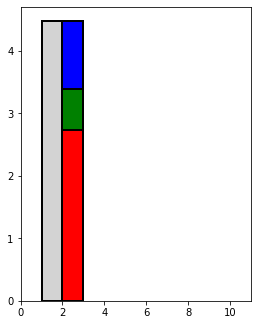

In [14]:
#fig, axs = plt.subplots(nrows = 3, ncols = 2)
fig = plt.figure()
w = 8 ; h = 24
fig.set_size_inches(w,h)
div = np.array([w, h, w, h])
ax1 = fig.add_axes(np.array([0.05,0.8,0.4,0.17]))
#ax2 = fig.add_axes(np.array([0.5,0.8,0.4,0.17]))
#ax3 = fig.add_axes(np.array([0.05,0.6,0.07,0.15]))
#ax1 = plt.bar(1,)
ax1.set_xlim(0,11)
ax1 = plt.bar(1.5, var5, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax1 = plt.bar(2.5, var5ec_ols, width=1, bottom=None, align='center', color='red', edgecolor='black', linewidth=2)
ax1 = plt.bar(2.5, variv5_ols, width=1., bottom=var5ec_ols, align='center', color='green',edgecolor='black', linewidth=2)
ax2 = plt.bar(2.5, var5 - (variv5_ols + var5ec_ols), width=1., bottom=variv5_ols + var5ec_ols, align='center', color='blue', edgecolor='black', linewidth=2)


plt.show()


In [10]:
print(variv5_ols)

<xarray.DataArray ()>
array(0.65761721)
